# Introduction to network analysis with networkx


Created by  
Demival Vasques Filho (vasquesfilho@ieg-mainz.de).  
https://www.ieg-mainz.de/en/institute/people/vasques_filho    
  
  
Networkx is a package (collection of modules) "for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks." (https://networkx.org/)

## Agenda
- Creating a network
- Basic concepts
- Types of networks
- Universal properties of real-world networks
- Centrality measures
- Community structure
- Visualization



In [1]:
# Let's start by importing the networkx package
import networkx as nx

### 1- Creating a network

Mathematically, we can define a (simple) network as a graph $G={U,L}$, where $G$ is the graph composed by a set of nodes (or vertices, the actors) $U$ and a set of links (or edges, the ties) $L$

In [19]:
# Initializing the network (graph) object
G = nx.Graph()

# we call the Graph() method from the networkx (nx) package to assign a 
# network (graph) object to the variable G

#### Adding nodes

In [20]:
# Now we can add nodes and links to the network. First let's add nodes
# We can add one node a time
G.add_node('1')

# Note that the name of the node we added is a string, but it could be an integer as well

# Let's check the nodes of the graph G:
print(G.nodes())

# This function returns a NodeView class with all the nodes in the network
print(type(G.nodes()))
# If we a want a list we just have to turn it into a list
print(type(list(G.nodes())))

['1']
<class 'networkx.classes.reportviews.NodeView'>
<class 'list'>


In [21]:
# We can also add nodes from a list of nodes
# Let's create a list first (just because we don't have one at the moment)
node_list = [str(i) for i in range(10)] #str(i) turns the integer variable into a string

# let's see our list with the elements that we want to add
print(node_list)

# note that in python the index starts from 0 and goes until the number before the interval

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [22]:
# we created a list by iterating number from 0 to 9 (that is what "range(10)" means)
# we could have done it in a more pedagogical way, as we did before
node_list = [] # first we create a empty list
for i in range(10): # then we iterate through the number in the range 0 to 10
    node_list.append(str(i)) # we append the numbers – as strings – in our list

# both methods provide the same result
print(node_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [23]:
# Then let's add all this elements as nodes of our network at the same time
G.add_nodes_from(node_list)

print(G.nodes())
# note that the node '1' is not repeated!

['1', '0', '2', '3', '4', '5', '6', '7', '8', '9']


In [24]:
# We can add atributes to the nodes. Let's add ages to some nodes
# We can do so, when we add a node to the network
G.add_node('10', age=45)

# Or we can add attributes to nodes that already exist in the network
G.nodes['1']['age'] = 32
G.nodes['0']['age'] = 15

# Let's check our nodes again, but now with the attributes
print(G.nodes(data=True))

# the data=True parameter tells the G.nodes methods to return the attributes a dictionaries

[('1', {'age': 32}), ('0', {'age': 15}), ('2', {}), ('3', {}), ('4', {}), ('5', {}), ('6', {}), ('7', {}), ('8', {}), ('9', {}), ('10', {'age': 45})]


#### Adding links

In [25]:
# We add links to the network in a similar way as we add nodes
# The difference is that now we need to inform the two node that are at each edge of the link
G.add_edge('1','2')

# Let's now check the edges of our network G
print(G.edges())

# The links are tuples in the NodeView (or list) class

[('1', '2')]


In [26]:
# Let's create a list of links so we can add several at the same time
# First we import the random package
import random

edge_list = []
for i in range(20): # we will repate the below 20 times
    u = random.choice(list(G.nodes())) # choosing one node at random from our nodes
    uprime = random.choice(list(G.nodes())) # choosing another node at random
    edge_list.append((u,uprime)) # note again that each element of the list is a tuple (u,u')
    
G.add_edges_from(edge_list)

# Let's now check the edges of our network G. Sometimes we won't have 20 links
# because we might choose the same pair at random and, similarly to the node, 
# networkx does not repeate the same links in a simple graph (we will see types of graph ahead)
print(G.edges())

[('1', '2'), ('1', '4'), ('1', '6'), ('1', '3'), ('0', '9'), ('0', '2'), ('3', '3'), ('3', '5'), ('3', '8'), ('3', '9'), ('5', '9'), ('5', '6'), ('5', '7'), ('6', '7'), ('7', '8'), ('7', '9'), ('8', '10')]
17


In [31]:
 print(f'Our network has {len(G.nodes())} nodes and {len(G.edges())} links')
    
# Notice that we added one link using G.add_edge() and 20 using G.add_edges_from(),
# so we should have 21 links, right? Not necessarily! Keep in mind that we have a 
# simple network, meaning that if we created two or more equal links due to the 
# random process, just one will stored in the networkx graph object

Our network has 11 nodes and 18 links


In [32]:
# We can also add attributes to the links. Let's add the year when the tie was created
# To a new link
G.add_edge('1','10', year=2015) # hopefully this link was not created above :)

# Or to existing links
G['1']['2']['year'] = 2012

# Let's check our links with attributes
print(G.edges(data=True))

[('1', '2', {'year': 2012}), ('1', '4', {}), ('1', '6', {}), ('1', '3', {}), ('1', '10', {'year': 2015}), ('0', '9', {}), ('0', '2', {}), ('3', '3', {}), ('3', '5', {}), ('3', '8', {}), ('3', '9', {}), ('5', '9', {}), ('5', '6', {}), ('5', '7', {}), ('6', '7', {}), ('7', '8', {}), ('7', '9', {}), ('8', '10', {})]


### 2- Basic concepts

##### Degree
The first and foremost attribute of a node $u \in U$ is its degree $q_u$, which is the number of links attached to the node (the number of neighbors in the simple network).

In [43]:
# We can check the degree of all nodes in the network

print(G.degree()) # DegreeView class
print(list(G.degree())) # List class
# In both, we have tuples where the first element is the node and 
# the second element is its degree

print(dict(G.degree())) # Dictionary class
# Nodes are keys and their degree are values

# We can also check the degree of a particular node
print(f"The degree of node 1 is {G.degree('1')}")

[('1', 5), ('0', 2), ('2', 2), ('3', 6), ('4', 1), ('5', 4), ('6', 3), ('7', 4), ('8', 3), ('9', 4), ('10', 2)]
[('1', 5), ('0', 2), ('2', 2), ('3', 6), ('4', 1), ('5', 4), ('6', 3), ('7', 4), ('8', 3), ('9', 4), ('10', 2)]
{'1': 5, '0': 2, '2': 2, '3': 6, '4': 1, '5': 4, '6': 3, '7': 4, '8': 3, '9': 4, '10': 2}
The degree of node 1 is 5


In [52]:
# Let's select just the nodes with degree larger than 4 (using the tuples first)
for tup in G.degree(): 
    if tup[1] > 4:
        print(tup[0])
        
# or
for tup in list(G.degree()):
    if tup[1] > 4:
        print(tup[0])

1
3
1
3


In [53]:
# Then using the dictionary

# .item() iterates through keys (that we called here u) and values (that we call q)
for u,q in dict(G.degree()).items(): 
    if q > 4:
        print(u)

1
3


##### Path
A path on a network is any possible way that a node $u$ reach another node $u'$, going from one connected node to another. The geodesic path between a pair of nodes is the shortest path through the network that connects them.

In [59]:
# We can check the path between two nodes
print(nx.shortest_path(G, source='2', target='6'))
print(nx.shortest_path(G, source='3', target='8'))

['2', '1', '6']
['3', '8']


In [60]:
# The distance between then is the length of the shostest path
print(nx.shortest_path_length(G, source='2', target='6'))
print(nx.shortest_path_length(G, source='3', target='8'))

2
1


##### Self loop

A link $(u,u)$ connecting a node to itself is called a self-loop.


In [63]:
G.add_edge('1','1')
print(G.edges())

[('1', '2'), ('1', '4'), ('1', '6'), ('1', '3'), ('1', '10'), ('1', '1'), ('0', '9'), ('0', '2'), ('3', '3'), ('3', '5'), ('3', '8'), ('3', '9'), ('5', '9'), ('5', '6'), ('5', '7'), ('6', '7'), ('7', '8'), ('7', '9'), ('8', '10')]


In [64]:
# Many real-world networks don't use self-loops, so let's remove this link
G.remove_edge('1','1')
print(G.edges())

# Similarly to adding nodes/links, to remove nodes/links we can use:
# G.remove_node()
# G.remove_nodes_from()
# G.remove_edge()
# G.remove_edges_from()

[('1', '2'), ('1', '4'), ('1', '6'), ('1', '3'), ('1', '10'), ('0', '9'), ('0', '2'), ('3', '3'), ('3', '5'), ('3', '8'), ('3', '9'), ('5', '9'), ('5', '6'), ('5', '7'), ('6', '7'), ('7', '8'), ('7', '9'), ('8', '10')]


### 3- Types of networks

So far, we have just worked with simple networks (graphs), but there are other types according to the characteristics of the links in the network. We will see now: multigraphs, weighted graphs, signed graphs, and directed graphs.

##### Multigraph
In a multigraph, there can exist multiple links between the same pair of nodes, called multilinks

In [65]:
# To create a multigraph in networkx we use
M = nx.MultiGraph()

In [66]:
# We add nodes in the same way
M.add_node('1', age=32)
M.add_node('10', age=45)

print(M.nodes(data=True))

[('1', {'age': 32}), ('10', {'age': 45})]


In [67]:
# We still can't added duplicates
M.add_node('1')

print(M.nodes(data=True))

[('1', {'age': 32}), ('10', {'age': 45})]


In [68]:
# But now we can add several links between the pair. For example every time the pair has an 
# encounter
M.add_edge('1','10', year=2015)
M.add_edge('1','10', year=2021)

print(M.edges(data=True))

[('1', '10', {'year': 2015}), ('1', '10', {'year': 2021})]


##### Weighted network

In a weighted network, the links of the graph have some value (weight) as attributes

In [69]:
# For networkx the weight of the link is an attribute, so there isn't 
# a particular graph type for this. We can use the networks we already have
# and just add the weight for some links

# Let's say that 1 and 10 had 3 encounters in 2015 and 5 in 2020. In the simple graph, 
# we can give just one value (because we have just one link)
G['1']['10']['weight'] = 8

print(G.edges(data=True))
# So we have the information that 1 and 10 first met in 2015 and they had 8 encounters
# since then.

[('1', '2', {'year': 2012}), ('1', '4', {}), ('1', '6', {}), ('1', '3', {}), ('1', '10', {'year': 2015, 'weight': 8}), ('0', '9', {}), ('0', '2', {}), ('3', '3', {}), ('3', '5', {}), ('3', '8', {}), ('3', '9', {}), ('5', '9', {}), ('5', '6', {}), ('5', '7', {}), ('6', '7', {}), ('7', '8', {}), ('7', '9', {}), ('8', '10', {})]


In [72]:
# In the multigraph, we can give the weight to each link between the pair
M['1']['10'][0]['weight'] = 3
M['1']['10'][1]['weight'] = 5

print(M.edges(data=True))

[('1', '10', {'year': 2015, 'weight': 3}), ('1', '10', {'year': 2021, 'weight': 5})]


##### Signed network

In a signed network, the links of the graph can have positive or negative values (weight) as attributes

In [74]:
# We can say that the everyone in our network are friends

for tup in G.edges():
    G[tup[0]][tup[1]]['sign'] = 'positive'

print(G.edges(data=True))

[('1', '2', {'year': 2012, 'sign': 'positive'}), ('1', '4', {'sign': 'positive'}), ('1', '6', {'sign': 'positive'}), ('1', '3', {'sign': 'positive'}), ('1', '10', {'year': 2015, 'weight': 8, 'sign': 'positive'}), ('0', '9', {'sign': 'positive'}), ('0', '2', {'sign': 'positive'}), ('3', '3', {'sign': 'positive'}), ('3', '5', {'sign': 'positive'}), ('3', '8', {'sign': 'positive'}), ('3', '9', {'sign': 'positive'}), ('5', '9', {'sign': 'positive'}), ('5', '6', {'sign': 'positive'}), ('5', '7', {'sign': 'positive'}), ('6', '7', {'sign': 'positive'}), ('7', '8', {'sign': 'positive'}), ('7', '9', {'sign': 'positive'}), ('8', '10', {'sign': 'positive'})]


In [76]:
# But in 2021, '1' and '10' became enemies
G['1']['10']['sign'] = 'negative'

print(G.edges(data=True))

[('1', '2', {'year': 2012, 'sign': 'positive'}), ('1', '4', {'sign': 'positive'}), ('1', '6', {'sign': 'positive'}), ('1', '3', {'sign': 'positive'}), ('1', '10', {'year': 2015, 'weight': 8, 'sign': 'negative'}), ('0', '9', {'sign': 'positive'}), ('0', '2', {'sign': 'positive'}), ('3', '3', {'sign': 'positive'}), ('3', '5', {'sign': 'positive'}), ('3', '8', {'sign': 'positive'}), ('3', '9', {'sign': 'positive'}), ('5', '9', {'sign': 'positive'}), ('5', '6', {'sign': 'positive'}), ('5', '7', {'sign': 'positive'}), ('6', '7', {'sign': 'positive'}), ('7', '8', {'sign': 'positive'}), ('7', '9', {'sign': 'positive'}), ('8', '10', {'sign': 'positive'})]


In [84]:
# We can check who are enemies in the network
for tup in G.edges(data=True):
    if G[tup[0]][tup[1]]['sign'] == 'negative':
        print(f'Nodes {tup[0]} and {tup[1]} are enemies')

Nodes 1 and 10 are enemies


In [85]:
# And if we want to be more specific, we can use the multigraph to tell when they became
# enemies
M['1']['10'][0]['sign'] = 'positive'
M['1']['10'][1]['sign'] = 'negative'

print(M.edges(data=True))

[('1', '10', {'year': 2015, 'weight': 3, 'sign': 'positive'}), ('1', '10', {'year': 2021, 'weight': 5, 'sign': 'negative'})]


##### Directed network
Links in a directed network have a direction, pointing from node $u$ to node $u'$. They are common in correspondece networks, where nodes are sender and recipients of letters.

Networkx has different objects for directed graphs

In [96]:
# One directed object
D = nx.DiGraph()

# In this object a pair of nodes can have only two links, each pointng in a different direction
# But we can also have several directed links pointing from a source node to a target node
# and the other way round
DM = nx.MultiDiGraph()

In [97]:
# We add nodes again, but now from our network G
D.add_nodes_from(G.nodes(data=True))
DM.add_nodes_from(G.nodes(data=True))

print(D.nodes(data=True))
print(DM.nodes(data=True))

[('1', {'age': 32}), ('0', {'age': 15}), ('2', {}), ('3', {}), ('4', {}), ('5', {}), ('6', {}), ('7', {}), ('8', {}), ('9', {}), ('10', {'age': 45})]
[('1', {'age': 32}), ('0', {'age': 15}), ('2', {}), ('3', {}), ('4', {}), ('5', {}), ('6', {}), ('7', {}), ('8', {}), ('9', {}), ('10', {'age': 45})]


In [98]:
# Now, when adding links to directed network, it is important to know the order of the nodes
# The first node is the source and the second is the target
# So let's say that 2 has send 5 letters to 4
D.add_edge('2','4', weight=5)

# And 4 has replied only twice
D.add_edge('4','2', weight=2)

print(D.edges(data=True))

[('2', '4', {'weight': 5}), ('4', '2', {'weight': 2})]


In [99]:
# Using the multigraph, we could have been more specific again
DM.add_edge('2','4', weight=3, year=2018, sign='positive')
DM.add_edge('2','4', weight=2, year=2019, sign='negative')
DM.add_edge('4','2', weight=2, year=2018, sign='positive')

print(DM.edges(data=True))

[('2', '4', {'weight': 3, 'year': 2018, 'sign': 'positive'}), ('2', '4', {'weight': 2, 'year': 2019, 'sign': 'negative'}), ('4', '2', {'weight': 2, 'year': 2018, 'sign': 'positive'})]


##### Two-mode network (bipartite)

Two-mode networks are those with two separate sets of nodes (usually nodes of differents types, e.g. one set of nodes represents people that are connected to the other set of nodes that represents institutions of which people are member – an affiliation network).

We can create a traditional one-mode network out of the two-mode network. We call this a projection. It is done using only one of the sets of nodes (any set). In a one-mode projection, people are connected, for instance, if they are member of the same institution.

Other examples of two-mode networks are author-papers, actor-movie, character-scene, word-sentence, and so on.

In networkx, there isn't a special network object for these networks, so we have to differentiate the sets of nodes using node attributes.

In [4]:
B = nx.Graph()

In [5]:
B.add_nodes_from(['A','B','C'], bipartite=0)
B.add_nodes_from(['1','2','3'], bipartite=1)
B.add_edges_from([('A','1'),('A','2'),('B','1'),('B','3'),('C','2'),('C','3')])

In [6]:
print(B.nodes(data=True))

[('A', {'bipartite': 0}), ('B', {'bipartite': 0}), ('C', {'bipartite': 0}), ('1', {'bipartite': 1}), ('2', {'bipartite': 1}), ('3', {'bipartite': 1})]


In [8]:
letters = set(u for u,a in B.nodes(data=True) if a['bipartite']==0)
numbers = set(u for u,a in B.nodes(data=True) if a['bipartite']==1)

In [9]:
print(letters)
print(numbers)

{'C', 'A', 'B'}
{'1', '3', '2'}


In [10]:
from networkx.algorithms import bipartite

Gp = bipartite.projected_graph(B, letters)

In [13]:
print(Gp.edges(data=True))
print(Gp.nodes(data=True))

[('C', 'A', {}), ('C', 'B', {}), ('A', 'B', {})]
[('C', {'bipartite': 0}), ('A', {'bipartite': 0}), ('B', {'bipartite': 0})]


### 4- Universal structural properties of real-world networks

Here, we start doing some network analysis of a "real-world" networks. First, we will create the network by loading data from a csv file, containing the list of links between characters of the book "A Storm of Swords," by George R. R. Martin<sup>1</sup>. Second, we will load a network object of letters exchanged between Portugal and its Atlantic colonies during the reign of Jose I (1750-1777) <sup>2</sup>

The structure of most real-world network present three characteristics, that we usually call the universal properties:
- Right-skewed degree distributions
- Small average shortest path length
- High clustering


1. A. Beveridge and J. Shan, "Network of Thrones." Math Horizons 23(4), 18-22 (2016)
2. Błoch, A., Vasques Filho, D., & Bojanowski, M., "Networks from archives: Reconstructing networks of official correspondence in the early modern Portuguese empire." Social Networks (2020).



In [100]:
# To load the data from "Networks of Thrones" we will use the pandas package
import pandas as pd

# Loading the data
data = pd.read_csv('stormofswords.csv')

In [101]:
# Let's check the structure of the data
print(data)

      Source       Target  Weight
0      Aemon        Grenn       5
1      Aemon      Samwell      31
2      Aerys        Jaime      18
3      Aerys       Robert       6
4      Aerys       Tyrion       5
..       ...          ...     ...
347   Walder        Petyr       6
348   Walder       Roslin       6
349   Walton        Jaime      10
350  Ygritte       Qhorin       7
351  Ygritte  Rattleshirt       9

[352 rows x 3 columns]


In [102]:
# We have 352 rows, each row is a link, cointaing the two nodes (source and target – this
# nomenclature can be ignored because this is not a directed network) and the weight of
# the link between the pair

#### Creating the network ####

G_thrones = nx.Graph()

# Turning columns into lists to facilitate
sources = list(data['Source'])
targets = list(data['Target'])
weights = list(data['Weight'])

# Adding the nodes and links simultaneously
for i in range(len(sources)):
    # we can do this because networkx recognizes exisiting nodes,
    # so it does not duplicate them
    G_thrones.add_edge(sources[i], targets[i], weight=weights[i])

In [116]:
# What is the size of the network?
print(f'The network of thrones has {len(G_thrones.nodes())} nodes' +
      f' and {len(G_thrones.edges())} links')

The network of thrones has 107 nodes and 352 links


In [106]:
# To load the network object, saved as gexf
G_jose = nx.read_gexf('network_Joseph_I_full.gexf')

In [117]:
# What is the size of the network?
print(f'The network of Jose I has {len(G_jose.nodes())} nodes' +
      f' and {len(G_jose.edges())} links')

The network of Jose I has 6814 nodes and 9633 links


#### Right-skewed degree distributions

The degree distribution tell us the number of nodes in the network with a particular degree (how many nodes with degree 1, how many with degree 2, and so on...).

In a network where links between nodes are created by chance (random networks) the degree distribution has a shape similar to a Poisson distribution. In contrast, real-worlds networks have degree distributions that are more similar to a power-law distribution (hence the famous term "scale-free").

In [155]:
# Let's take the network of letters as example (because it is larger), and create a 
# random network with the same number of nodes and links
G_random = nx.gnm_random_graph(len(G_jose.nodes()), len(G_jose.to_undirected().edges()))

# Now, we sort the degree that exist in the network in a list
q_sorted = sorted(set(dict(G_random.degree()).values()))
# and count how many nodes have each of these degree in another list
q_dist = [list(dict(G_random.degree()).values()).count(q) for q in q_sorted]

<function matplotlib.pyplot.show(*args, **kw)>

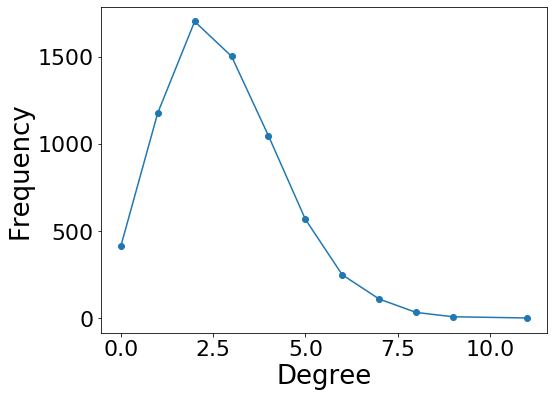

In [156]:
# And we plot the distribution
# We import the package for plotting figures
import matplotlib.pyplot as plt

# We initialize the figure environment
plt.figure(figsize=(8,6))

# We plot the values in the lists
plt.plot(q_sorted,q_dist,'o', linestyle='-')

# We give some info to the figure
plt.xlabel('Degree', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=22)

# We display the figure
plt.show

In [111]:
# But how would the degree distribution of the real network look like?
q_sorted = sorted(set(dict(G_jose.degree()).values()))
q_dist = [list(dict(G_jose.degree()).values()).count(q) for q in q_sorted]

<function matplotlib.pyplot.show(*args, **kw)>

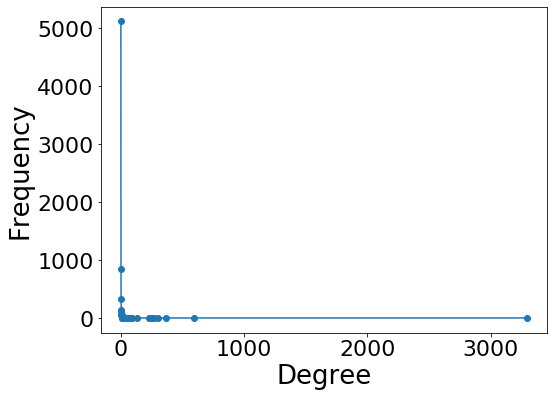

In [112]:
# And we plot the distribution
plt.figure(figsize=(8,6))

plt.plot(q_sorted,q_dist,'o', linestyle='-')

plt.xlabel('Degree', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=22)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

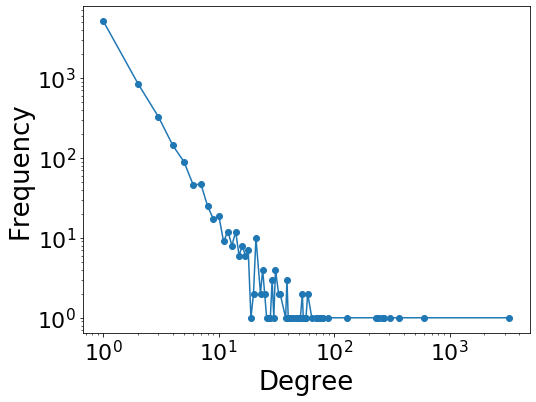

In [113]:
# Then, we change the scale of the figure from linear to logarithm 

plt.figure(figsize=(8,6))

# Here we change from plot to loglog
plt.loglog(q_sorted,q_dist,'o', linestyle='-')

plt.xlabel('Degree', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=22)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

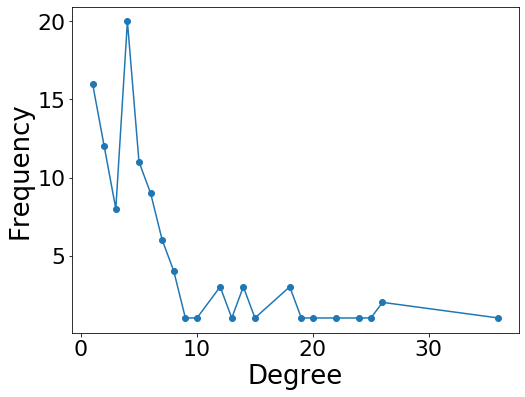

In [118]:
# The "straight" line that appears when we use the logarithmic scale resembles the
# straight line of the power-law distribution in a loglog plot

# What about the network of thrones, that is much smaller?
# First with linear scale
q_sorted = sorted(set(dict(G_thrones.degree()).values()))
q_dist = [list(dict(G_thrones.degree()).values()).count(q) for q in q_sorted]

plt.figure(figsize=(8,6))

plt.plot(q_sorted,q_dist,'o', linestyle='-')

plt.xlabel('Degree', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=22)

plt.show

The network is so small that we don't need a logarithmic scale for the degree distribution, but we can still see that the distribution is right-skewed: many nodes with few connections and few nodes with many connections.

#### Small average shortest path length
This is much simpler than the degree distributions :)

Networks in general (even random ones!) have a small average path length, i.e. the average number of hops that any node needs to reach any other is MUCH smaller than the number of nodes in the network

In [124]:
print(nx.average_shortest_path_length(G_thrones))

2.903897019925939


Now we introduce the concept of network components. That is, a network might have nodes that cannot reach others. They are not even indirectly connect and therefore are in different components of the network (groups of nodes that can't reach others). In that case, we usually take the largest component of the network to measure the average shortest path length


In [147]:
# Size of the LCC of the projected network

# We define the (Connected) Components of the network,
CCs = sorted(nx.connected_components(G_jose.to_undirected()), key=len, reverse=True)
# take only the Largest Connected Component,
LCC = G_jose.to_undirected().subgraph(CCs[0])

print(len(LCC), len(LCC)/len(G_jose.nodes()))

6554 0.961843263868506


In [148]:
# and find the average shortest path length of the largest component
# print(nx.average_shortest_path_length(LCC))
# Takes too long, because the network is large

3.0946690819081764


#### High clustering 

Clustering measures the number of closed triads (the friend of my friend is also my friend) with respect to the total number of triads (I have a friend that has another friend). Clustering is usually much higher in real networks than in random networks.

In [157]:
# For the network of thrones
print(nx.transitivity(G_thrones))

G_random = nx.gnm_random_graph(len(G_thrones.nodes()), len(G_thrones.edges()))
print(nx.transitivity(G_random))

0.3286615276804485
0.061802575107296136


In [158]:
# For the network of letters
print(nx.transitivity(G_jose.to_undirected()))

G_random = nx.gnm_random_graph(len(G_jose.nodes()), len(G_jose.to_undirected().edges()))
print(nx.transitivity(G_random))

0.0016553374661370474
0.0005874750323111268


### 5- Centrality measures

We now will focus on the analysis of the network of thrones. We will check the top 10 characters with the following centrality measures:
- degree centrality
- closeness centrality
- betweenness centrality
- eigenvector centrality

##### Degree centrality
It is the same as the degree (number of neighbors) of the node. 

In [162]:
# Most connected nodes

# We will use the collections package to help us
import collections
q = collections.Counter(dict(G_thrones.degree()))

print('Most connected nodes')
# we can change the parameter of the most_common() method to increase or decrese the number
# of nodes in the ranking
for u, q in q.most_common(10):
    print('%s: %i' % (u, q))

Most connected nodes
Tyrion: 36
Jon: 26
Sansa: 26
Robb: 25
Jaime: 24
Tywin: 22
Cersei: 20
Arya: 19
Robert: 18
Joffrey: 18


##### Closeness centrality
It measures how easy a node can reach every node in the network (based on its shortest paths to every other node)

In [165]:
# Closeness centrality
cl_ct = collections.Counter(nx.closeness_centrality(G_thrones))

print('Highest closeness centrality')
for u, q in cl_ct.most_common(10):
    print('%s: %f' % (u, q))

Highest closeness centrality
Tyrion: 0.512077
Sansa: 0.509615
Robert: 0.500000
Robb: 0.488479
Arya: 0.486239
Jaime: 0.479638
Jon: 0.479638
Stannis: 0.479638
Tywin: 0.469027
Eddard: 0.460870


##### Betweenness centrality
It measures how a node stands in the shortest path of every pair of nodes in the network. It tells if the node is acting like a broker, a gate keeper, possibly linking different communitites.

In [166]:
# Betweenness centrality
bt_ct = collections.Counter(nx.betweenness_centrality(G_thrones, normalized=True, \
                                                      weight='weight'))

print('Highest betweenness centrality')
for u, q in bt_ct.most_common(10):
    print('%s: %f' % (u, q))

Highest betweenness centrality
Robert: 0.209551
Tyrion: 0.209125
Jon: 0.165606
Stannis: 0.125160
Sansa: 0.122833
Catelyn: 0.107457
Daenerys: 0.098323
Janos: 0.091045
Tywin: 0.087823
Arya: 0.080707


##### Eigenvector centrality
It measures if a node is well connected to other well-connected nodes. If the neighbors of a node are popular (have high degree)


In [169]:
# Eigenvector centrality
ev_ct = collections.Counter(nx.eigenvector_centrality(G_thrones, weight='weight'))

print('Highest eigenvector centrality')
for u, q in ev_ct.most_common(10):
    print('%s: %f' % (u, q))

Highest eigenvector centrality
Tyrion: 0.473405
Sansa: 0.384595
Jaime: 0.305459
Joffrey: 0.304478
Cersei: 0.270385
Robb: 0.207564
Tywin: 0.192818
Bran: 0.160921
Arya: 0.159611
Brienne: 0.157121


### 6- Community structure
There are several methods (algorithms) that we can use to identify communities according to the links between nodes. Here we are going to use the Louvain method.

In [171]:
import community

#dict - node as key, community number as value
comm_dict = community.best_partition(G_thrones)
print(comm_dict)

# set of communities - community numbers
comm_set = set(list(comm_dict.values())) 
print(comm_set)

comm_org = {comm:[] for comm in list(comm_set)}
for node, comm in comm_dict.items():
    comm_org[comm].append(node)
print(comm_org)

{'Aemon': 0, 'Grenn': 0, 'Samwell': 0, 'Aerys': 1, 'Jaime': 1, 'Robert': 1, 'Tyrion': 1, 'Tywin': 1, 'Alliser': 0, 'Mance': 0, 'Amory': 1, 'Oberyn': 1, 'Arya': 2, 'Anguy': 2, 'Beric': 2, 'Bran': 3, 'Brynden': 4, 'Cersei': 1, 'Gendry': 2, 'Gregor': 1, 'Joffrey': 1, 'Jon': 0, 'Rickon': 3, 'Roose': 4, 'Sandor': 2, 'Thoros': 2, 'Balon': 1, 'Loras': 1, 'Belwas': 5, 'Barristan': 5, 'Illyrio': 5, 'Hodor': 3, 'Jojen': 3, 'Luwin': 3, 'Meera': 3, 'Nan': 3, 'Theon': 3, 'Brienne': 1, 'Bronn': 1, 'Podrick': 1, 'Lothar': 4, 'Walder': 4, 'Catelyn': 4, 'Edmure': 4, 'Hoster': 4, 'Jeyne': 4, 'Lysa': 1, 'Petyr': 1, 'Robb': 4, 'Roslin': 4, 'Sansa': 1, 'Stannis': 6, 'Elia': 1, 'Ilyn': 1, 'Meryn': 1, 'Pycelle': 1, 'Shae': 1, 'Varys': 1, 'Craster': 0, 'Karl': 0, 'Daario': 5, 'Drogo': 5, 'Irri': 5, 'Daenerys': 5, 'Aegon': 5, 'Jorah': 5, 'Kraznys': 5, 'Missandei': 5, 'Rakharo': 5, 'Rhaegar': 5, 'Viserys': 5, 'Worm': 5, 'Davos': 6, 'Cressen': 6, 'Salladhor': 6, 'Eddard': 2, 'Eddison': 0, 'Gilly': 0, 'Qyburn': 1

### 7- Network visualization

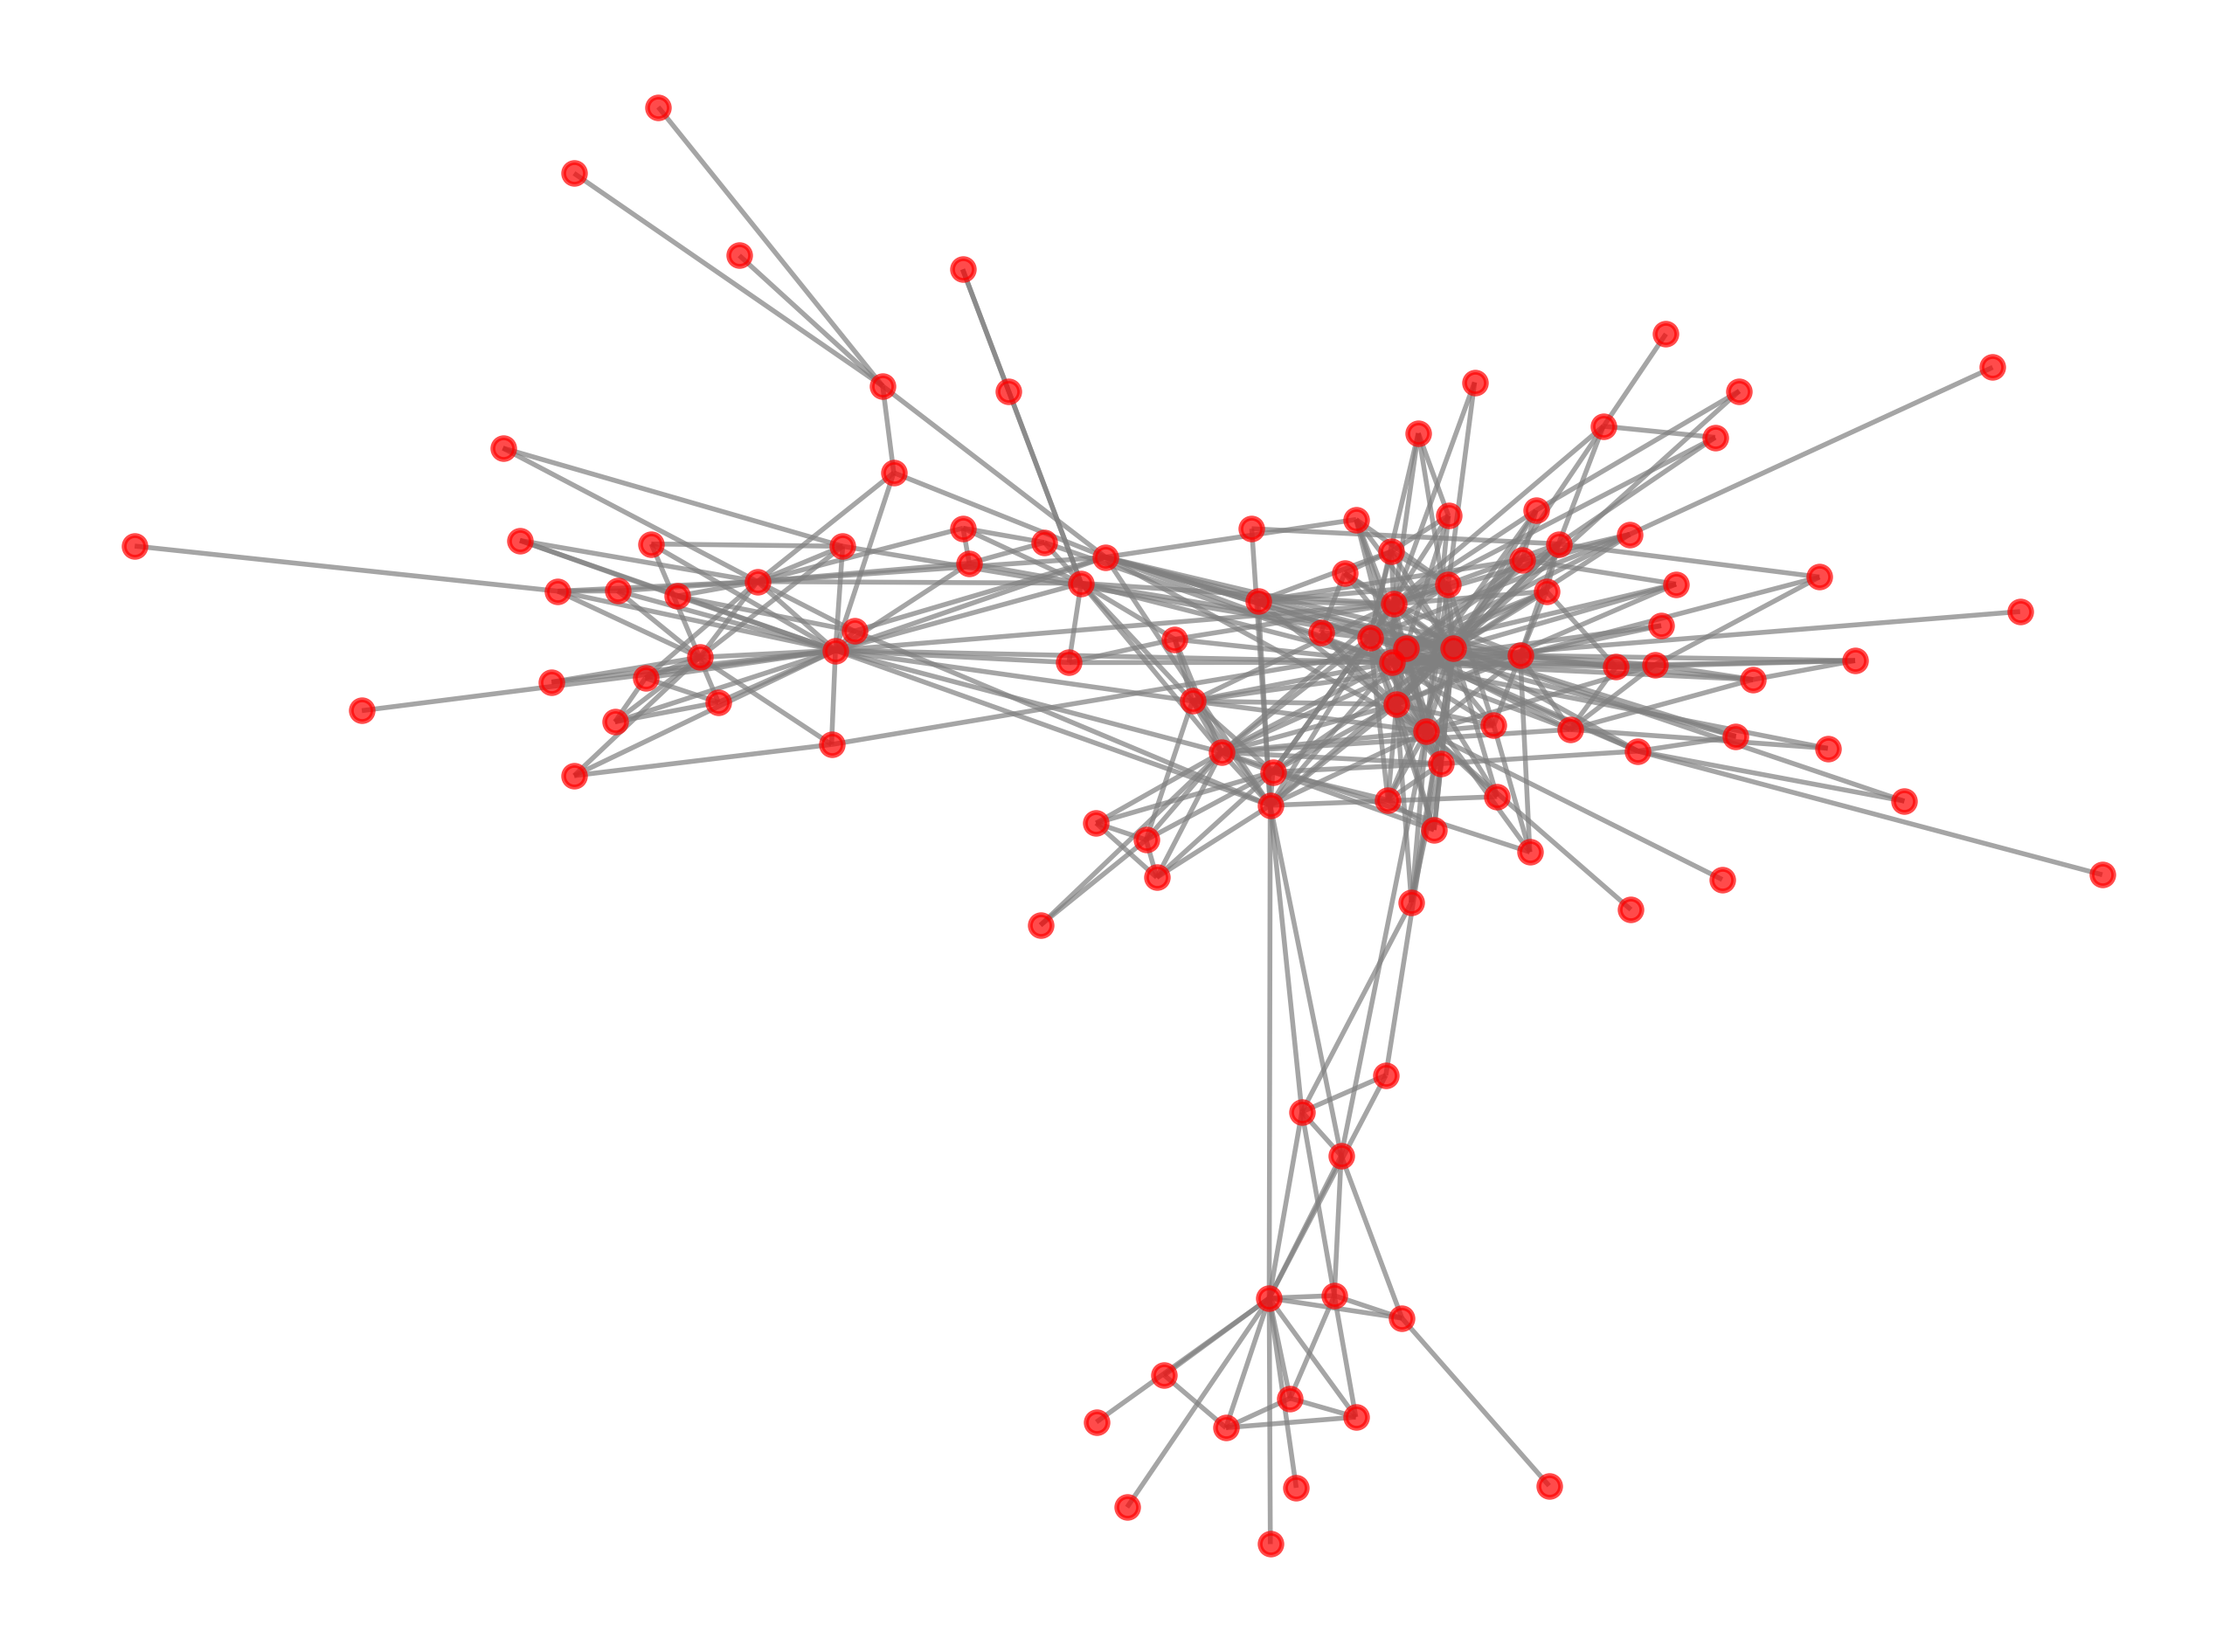

In [191]:
# Simple drawing

# Figure environment
f = plt.figure(1,figsize=(8,6), dpi=400)

# Network layout
pos=nx.spring_layout(G_thrones)

# Drawing the whole network
nx.draw_networkx(G_thrones, pos=pos, with_labels=False, node_size=20, \
                 node_color='r',alpha=0.7,edge_color='gray')

# Showing the figure
plt.axis('off')
plt.show()

In [1]:
# More advanced drawing
# Figure environment
f = plt.figure(1,figsize=(8,6), dpi=400)

# Network layout
pos=nx.spring_layout(G_thrones,iterations=50,weight='weight',scale=1.0, k=0.75, seed=12) 

# Node colors based on communities
colors={0:'#e41a1c', 1:'#377eb8', 2:'#4daf4a', 3:'#984ea3', 4:'#ff7f00', \
        5:'#a6cee3', 6:'#a65628'}

# Labels for the highest between centrality
labelling = {u:u for u,lab in pos.items() if u in pos if bt_ct[u]>0.095} 

# Drawing nodes
nx.draw_networkx_nodes(G_thrones, pos=pos,
                node_size=[max(G_thrones.degree(u)*6.5,5) for u in G_thrones], \
                alpha=0.8, edge_color='k',\
                node_color=[colors[c] for u,c in comm_dict.items()])
                       #node_color=[G.nodes[node]['colour'] for node in G])

# Drawing edges
weights = [(G_thrones[u][v]['weight']/20) for u,v in G_thrones.edges()]
nx.draw_networkx_edges(G_thrones, pos=pos, width=weights, alpha=0.6, \
                       edge_color='gray')

# Drawing labels
nx.draw_networkx_labels(G_thrones, pos=pos, labels=labelling, font_size=9)

# Showing and saving the figure
plt.axis('off') 
#plt.savefig('workshop_network.png', format='png', dpi=400)
#plt.savefig('workshop_network.pdf', format='pdf', dpi=400)
plt.show()

NameError: name 'plt' is not defined

### For the group activity

- How to load data from json files

Star Wars 
E. Gabasova, "The Star Wars social network." Evelina Gabasova's Blog, Accessed 31 December (2015)  
https://github.com/evelinag/StarWars-social-network/tree/master/networks

In [2]:
# loading the data
import json

with open('star_wars_1-7.json') as f:
    data = json.load(f)

In [3]:
print(data)

{'nodes': [{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'}, {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'}, {'name': 'PK-4', 'value': 3, 'colour': '#808080'}, {'name': 'TC-14', 'value': 4, 'colour': '#808080'}, {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'}, {'name': 'DOFINE', 'value': 3, 'colour': '#808080'}, {'name': 'RUNE', 'value': 10, 'colour': '#808080'}, {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'}, {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'}, {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'}, {'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'}, {'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'}, {'name': 'TARPALS', 'value': 3, 'colour': '#808080'}, {'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'}, {'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'}, {'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'}, {'name': 'WATTO', 'value': 8, 'colour': '#808080'}, {'name': 'ANAKIN', 'value': 131, 'colour': '#ce3b59'}, {'

In [9]:
# structure of the data
print(data['nodes'][2])
print(data['links'][0])

{'name': 'PK-4', 'value': 3, 'colour': '#808080'}
{'source': 1, 'target': 0, 'value': 1}


In [ ]:
#### Creating the network ####

G = nx.Graph()

# adding the nodes
node_id = 0
for node in data['nodes']:
    G.add_node(node_id, label=node['name'], presence=node['value'], colour=node['colour'])
    node_id += 1
    
# adding the links
for link in data['links']:
    G.add_edge(link['source'],link['target'], weight=link['value'])

In [7]:
print(data['nodes'])

[{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'}, {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'}, {'name': 'PK-4', 'value': 3, 'colour': '#808080'}, {'name': 'TC-14', 'value': 4, 'colour': '#808080'}, {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'}, {'name': 'DOFINE', 'value': 3, 'colour': '#808080'}, {'name': 'RUNE', 'value': 10, 'colour': '#808080'}, {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'}, {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'}, {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'}, {'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'}, {'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'}, {'name': 'TARPALS', 'value': 3, 'colour': '#808080'}, {'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'}, {'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'}, {'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'}, {'name': 'WATTO', 'value': 8, 'colour': '#808080'}, {'name': 'ANAKIN', 'value': 131, 'colour': '#ce3b59'}, {'name': 'SE